In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here the Regressions are

*   Linear Regression
*   Polynomial Regression
*   Logistic Regression
*   Softmax Regression





Linear Looking dataset

In [3]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
import matplotlib.pyplot as plt

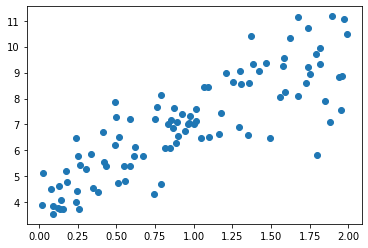

In [5]:
plt.scatter(X,y)

In [6]:
#Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [8]:
y_predict = X_new_b.dot(theta_best)

In [9]:
y_predict

array([[4.30859707],
       [9.90659136]])

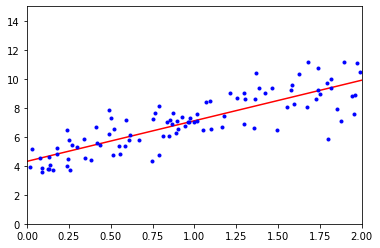

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
X_new1 = np.arange(0,2.05,0.05)
X_new1 = np.c_[np.ones((41,1)),X_new1]

In [12]:
y_predict1 = X_new1.dot(theta_best)

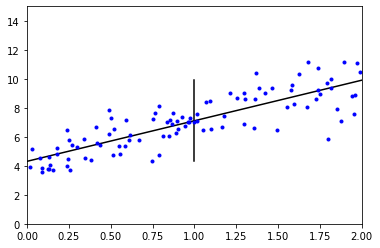

In [13]:
plt.plot(X_new1, y_predict1, "k")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

**Using Linear regression Library**

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([4.30859707]), array([[2.79899714]]))

In [16]:
lib_pred=lin_reg.predict(X_new)

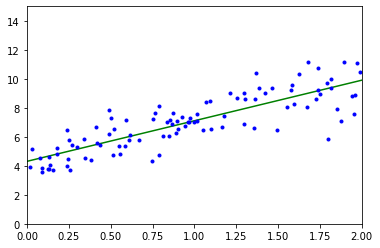

In [17]:
plt.plot(X_new, lib_pred, "g-")
#plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Polynimial Regression

In [18]:
# generate data using quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

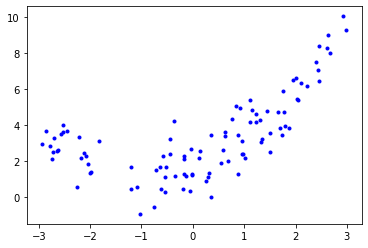

In [19]:
plt.plot(X,y,'b.')

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.12368433]
[-0.12368433  0.01529781]


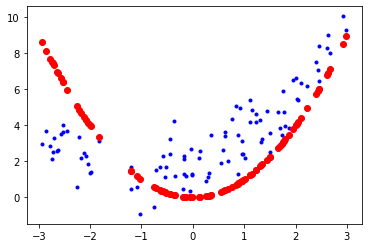

In [21]:
plt.plot(X,y,'b.')
plt.plot(X,X_poly[:,1],'ro')

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.7036994]), array([[0.97051007, 0.54705163]]))

In [23]:
new=lin_reg.predict(X_poly)

ValueError: ignored

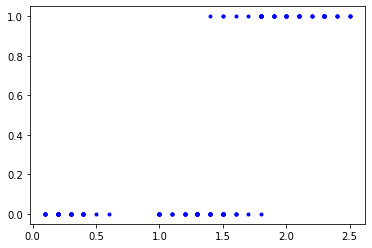

In [85]:
plt.plot(X,y,'b.')
plt.plot(X,new,'r-')

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
'''
def plot_learn_curve(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  train_errors,val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

'''


'\ndef plot_learn_curve(model,X,y):\n  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)\n  train_errors,val_errors = [],[]\n  for m in range(1, len(X_train)):\n    model.fit(X_train[:m], y_train[:m])\n    y_train_predict = model.predict(X_train[:m])\n    y_val_predict = model.predict(X_val)\n    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))\n    val_errors.append(mean_squared_error(y_val, y_val_predict))\n\nplt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")\nplt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")\n\nlin_reg = LinearRegression()\nplot_learning_curves(lin_reg, X, y)\n\n'

Ridge Regression


> Regularized version of linear regression



In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.45575026]])

# Logistic Regression

In [27]:
from sklearn import datasets
iris =  datasets.load_iris()

In [28]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
X = iris['data'][:,3:]

In [30]:
y = (iris["target"]==2).astype(np.int)

In [31]:
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression()
log_Reg.fit(X,y)

LogisticRegression()

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)

In [33]:
y_prob = log_Reg.predict_proba(X_new)

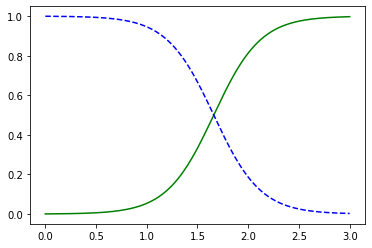

In [34]:
plt.plot(X_new, y_prob[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label="Not Iris-Virginica")

In [35]:
y_pred = log_Reg.predict(X_new)

In [74]:
pet_length = iris['data'][:,0]

In [37]:
y_pred = np.array(y_pred)
y_pred=y_pred.reshape(-1,1)

In [38]:
data = np.concatenate((X_new,y_pred),axis=1)

In [39]:
data

array([[0.        , 0.        ],
       [0.003003  , 0.        ],
       [0.00600601, 0.        ],
       ...,
       [2.99399399, 1.        ],
       [2.996997  , 1.        ],
       [3.        , 1.        ]])

In [40]:
import pandas as pd
df = pd.DataFrame(data)

In [41]:
df

,0,1
0,0.000000,0.0
1,0.003003,0.0
2,0.006006,0.0
3,0.009009,0.0
4,0.012012,0.0
...,...,...
995,2.987988,1.0
996,2.990991,1.0
997,2.993994,1.0
998,2.996997,1.0


In [92]:
#df.index[df['BoolCol'] == True].tolist()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [95]:
#index_of_maximum = np.where(v == maximum)
ind1 = np.where(y==1)
ind2 = np.where(y!=1)

In [97]:
ind2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [101]:
petlength = iris['data'][:,0]


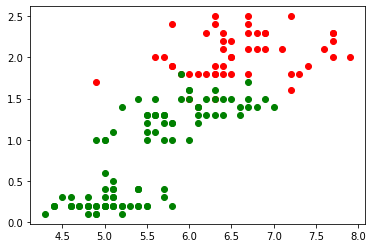

In [105]:
plt.plot(petlength[ind1],X[ind1],'ro')
plt.plot(petlength[ind2],X[ind2],'go')